# QuaSaR: Identifying EEW Rings - Waveform Analysis

[Quake Safe Rings](./1a_stations_faultlnes_plot.ipynb) - in our efforts to understand the station waveform data - we are using GeoNet provided [FDSN IRIS SeedLink API](http://ds.iris.edu/ds/nodes/dmc/services/seedlink/). The intent is to:
1. Make use of the SeedLink to get station-wise velocity and acceleration time-series data for a given window
1. Convert the time-series to tensors to be able to apply linear algebra and calculus on the datasets
1. Formulate station rings based on the class of tensors they belong to (e.g. accelerometers)

In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch between 'default' and 'ignore'

In [1]:
import sys
sys.path.insert(1, '/home/nuwan/workspace/quasar/lib')

import stations
import faults

''' TODO send time window '''
cls_st = stations.station_data()
__client = cls_st.get_client()
#lst_val_st, lst_inval_st = cls_st.get_stations(cls_st.get_client())
lst_val_st, lst_inval_st = cls_st.get_stations(__client)

Retrieving active stations with a 
start-time: 2021-02-02T03:57:07.551655Z 
 & end-time: 2021-02-09T03:57:07.551684Z
FDSN Webservice Client (base url: http://service.geonet.org.nz)
Available Services: 'dataselect' (v1.1), 'event' (v1.1), 'station' (v1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


3 Trace(s) in Stream:
NZ.KIKS.20.HN1 | 2021-02-02T03:57:07.550000Z - 2021-02-03T00:00:00.140000Z | 200.0 Hz, 14434519 samples
NZ.KIKS.20.HN2 | 2021-02-02T03:57:07.550000Z - 2021-02-03T00:00:00.185000Z | 200.0 Hz, 14434528 samples
NZ.KIKS.20.HNZ | 2021-02-02T03:57:07.550000Z - 2021-02-03T00:00:01.355000Z | 200.0 Hz, 14434762 samples


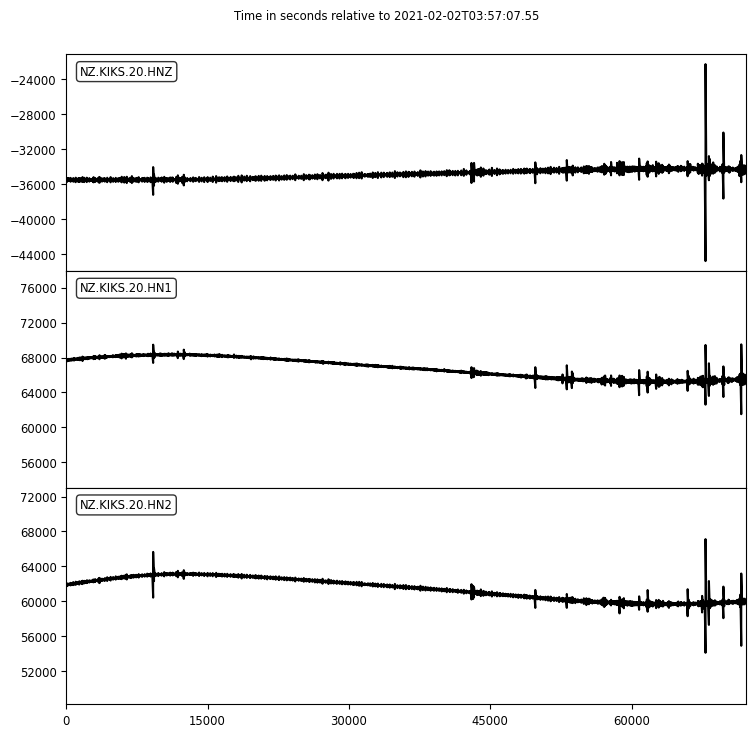

In [2]:
for st_idx, (st_code, st_type, st_lat, st_lon) in enumerate(lst_val_st):
    if st_code == 'KIKS':
        trace = cls_st.get_station_waveform(client=__client,station_code=st_code)
        print(trace[0:3])
        trace.plot(type="relative")
#        trace.plot()

[ObsPy trigger-picker](https://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html) offers a multitude of algorithms and functions to apply common EQ picks such as Classic Short Time Average through Long Time Average (STA/LTA).

Component[0] with trace stats 
               network: NZ
               station: KIKS
              location: 20
               channel: HN1
             starttime: 2021-02-02T03:57:07.550000Z
               endtime: 2021-02-03T00:00:00.140000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 14434519
                 calib: 1.0
_fdsnws_dataselect_url: http://service.geonet.org.nz/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 32031, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 48918528})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2021, 2, 9, 3, 57, 7, 550000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2021, 2, 2, 3, 57, 7, 550000))']
              response: Channel Response
	From m/s**2 () to count ()
	Overall Sensitivity: 427336 defined at 1.000 Hz
	6 stages:
		Stage 1: PolesZerosRespon

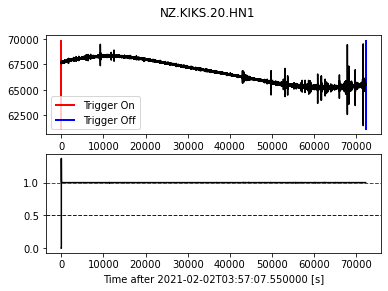

In [3]:
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, plot_trigger
#from obspy.signal.trigger import plot_trigger

for idx_tr, item_tr in enumerate(trace):
    print(f'Component[{idx_tr}] with trace stats \n{item_tr.stats}')
    df = item_tr.stats.sampling_rate
#    cft = classic_sta_lta(item_tr.data, int(5 * df), int(10 * df))
#    plot_trigger(item_tr, cft, 1.0, 0.5)
    cft = recursive_sta_lta(item_tr.data, int(5 * df), int(10 * df))
    plot_trigger(item_tr, cft, 1.0, 0.5)
    break
#    for acc in item_tr:
#        print(acc)